#Natural Language Processing with Disaster Tweets
##Predict which Tweets are about real disasters and which ones are not
Each sample in the train and test set has the following information:

- The `text` of a tweet
- A `keyword` from that tweet (although this may be blank!)
- The `location` the tweet was sent from (may also be blank)

We are predicting whether a given tweet is about a real disaster or not. If so, predict a 1. If not, predict a 0.

Files
- [Disaster_tweets_train](https://github.com/aashikolhar/Deep-Learning-with-TensorFlow/blob/main/Natural%20Language%20Processing%20with%20TensorFlow/Disaster_tweets_train.csv)
- [Disaster_tweets_test](https://github.com/aashikolhar/Deep-Learning-with-TensorFlow/blob/main/Natural%20Language%20Processing%20with%20TensorFlow/Disaster_tweets_test.csv)

`Columns id` - a unique identifier for each tweet

`text` - the text of the tweet

`location` - the location the tweet was sent from (may be blank)

`keyword` - a particular keyword from the tweet (may be blank)

`target` - in train.csv only, this denotes whether a tweet is about a real disaster - (1) or not (0)

In [19]:
# Loading the training data
import pandas as pd
data_df = pd.read_csv("Disaster_tweets_train.csv")
data_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [20]:
# Shuffling the loaded training data
data_df_shuffled = data_df.sample(frac=1, axis=0, random_state=42)
data_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [21]:
# Splitting the training data into train and validation datasets
from sklearn.model_selection import train_test_split
train_sentences, val_sentences, train_labels, val_labels = train_test_split(data_df_shuffled["text"].to_list(),
                                                                            data_df_shuffled["target"].to_list(),
                                                                            test_size=0.1,
                                                                            random_state=42)
len(train_sentences), len(train_labels), len(val_sentences), len(val_labels)

(6851, 6851, 762, 762)

In [22]:
# Viewing the first 5 train sentences and train labels
train_sentences[:5], val_labels[:5]

(['@mogacola @zamtriossu i screamed after hitting tweet',
  'Imagine getting flattened by Kurt Zouma',
  '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
  "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
  'Somehow find you and I collide http://t.co/Ee8RpOahPk'],
 [0, 0, 1, 1, 1])

In [23]:
# Creating a list showing the length of each sentence in the training set 
length_of_sentence = [len(sentence.split()) for sentence in train_sentences]
# Viewing the length of the first 5 train_sentences
length_of_sentence[:5]

[7, 6, 20, 12, 7]

(array([ 106.,  424.,  810., 1108., 1176., 1301.,  983.,  637.,  252.,
          54.]),
 array([ 1.,  4.,  7., 10., 13., 16., 19., 22., 25., 28., 31.]),
 <a list of 10 Patch objects>)

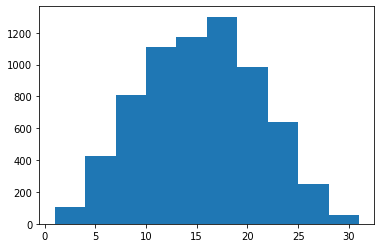

In [24]:
# Check the distribution of the length of sentences in train_sentences
import matplotlib.pyplot as plt
plt.hist(length_of_sentence)

In [25]:
# Maximum length of the sentence in train_sentences
max(length_of_sentence)

31

In [26]:
# Length of the sentence which covers 95% of the sentences in train_sentences
import numpy as np
max_length = int(np.percentile(length_of_sentence, 95))
max_length

24

In [27]:
# Defining the parameters for tokenizing train_sentences
NUM_WORDS = 10000 # size of our vocabulary
MAX_LEN = 24 # choosing 24 as it covers 95% of the train_sentences

In [28]:
# Tokenizing the sentences
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=NUM_WORDS, oov_token = "<OOV>")
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index
train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, maxlen=MAX_LEN, padding="post", truncating="post")
val_sequences = tokenizer.texts_to_sequences(val_sentences)
val_padded = pad_sequences(val_sequences, maxlen=MAX_LEN, padding="post", truncating="post")

In [38]:
# Converting the train and validation labels into numpy arrays
train_labels = np.array(train_labels)
val_labels = np.array(val_labels)

In [39]:
# Build the model (Using Sequential API of keras)
# The model consists of Conv1D layer, Bidirectional layer using LSTM and a final Dense layer 
model = tf.keras.Sequential([
 tf.keras.layers.Embedding(input_dim=NUM_WORDS, output_dim=128, input_length=MAX_LEN),
 tf.keras.layers.Conv1D(filters=10, kernel_size=3, activation="relu"),
 tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(10, return_sequences=True )),
 tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(10)),
 tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model.compile(loss="binary_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])

# Fit the model
model.fit(train_padded,
            train_labels,
            epochs=15,
            validation_data=(val_padded, val_labels))

Epoch 1/15
215/215 [==============================] - 18s 49ms/step - loss: 0.5230 - accuracy: 0.7383 - val_loss: 0.4585 - val_accuracy: 0.7979
Epoch 2/15
215/215 [==============================] - 10s 45ms/step - loss: 0.3216 - accuracy: 0.8770 - val_loss: 0.4592 - val_accuracy: 0.8018
Epoch 3/15
215/215 [==============================] - 10s 46ms/step - loss: 0.2230 - accuracy: 0.9207 - val_loss: 0.5068 - val_accuracy: 0.8005
Epoch 4/15
215/215 [==============================] - 9s 43ms/step - loss: 0.1552 - accuracy: 0.9495 - val_loss: 0.5878 - val_accuracy: 0.7769
Epoch 5/15
215/215 [==============================] - 10s 45ms/step - loss: 0.1057 - accuracy: 0.9631 - val_loss: 0.6441 - val_accuracy: 0.7730
Epoch 6/15
215/215 [==============================] - 10s 46ms/step - loss: 0.0739 - accuracy: 0.9746 - val_loss: 0.7827 - val_accuracy: 0.7717
Epoch 7/15
215/215 [==============================] - 10s 44ms/step - loss: 0.0534 - accuracy: 0.9793 - val_loss: 0.8737 - val_accuracy: 

In [40]:
model.evaluate(val_padded, val_labels)

24/24 [==============================] - 0s 7ms/step - loss: 1.4011 - accuracy: 0.7585


[1.4011107683181763, 0.7585301995277405]

In [41]:
# Loading the test data
import pandas as pd
data_test = pd.read_csv("Disaster_tweets_test.csv")
data_test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [42]:
# Creating a list of only text column from test data
test_sentences = data_test["text"].to_list()
# Viewing the first 5 examples in test data
test_sentences[:5]

['Just happened a terrible car crash',
 'Heard about #earthquake is different cities, stay safe everyone.',
 'there is a forest fire at spot pond, geese are fleeing across the street, I cannot save them all',
 'Apocalypse lighting. #Spokane #wildfires',
 'Typhoon Soudelor kills 28 in China and Taiwan']

In [43]:
# Tokenizing the test_sentences
test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences, maxlen=MAX_LEN, padding="post", truncating="post")

In [45]:
# Making predictions on the test data
model_preds = tf.round(model.predict(test_padded))
# Viewing the first 10 predictions
model_preds[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)>